In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [4]:
dataset = pd.read_csv('../data/interim/02-01-solved-irrealistic-year-negative-predvar.csv')

In [5]:
dataset.head()

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
0       279.0        2016-04-01      2016-04-23                      7   
1       286.0        2016-04-01      2016-04-23                      7   
2         1.0        2000-01-01      2016-02-10                      6   
3       699.0        2016-06-16      2016-08-02                      7   
4       473.0        2000-01-01      2016-05-02                      7   

   FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA        DATA  \
0              1                  1              5.0  2016-04-07   
1              1                  1              5.0  2016-04-14   
2              4                  4              3.0  2016-02-10   
3              1                  1              4.0  2016-07-28   
4              1                  1              4.0    2008-3-2   

   CODICE_GIOCO  RILANCIO_PUBBLICITA   SESSIONE  NUMERO_CLICK_SITO  \
0           461                   30  121941195               5510   
1           761                  161  122582337               5150   
2           628                  174  117101149               5510   
3           363                  179  134105783               5160   
4           105                  168  124139895               5239   

   OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  MICRO_CATEGORIA_GIOCO  \
0                 0.100                      2                      1   
1                 0.182                      3                      1   
2                 0.000                      2                      1   
3                 0.231                      3                      1   
4                 0.220                      2                      1   

   AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI      ID  
0           0                              1   85091  
1           0                              0   18118  
2           0                              1  129575  
3           0                              0   38961  
4         114                              4  133839

In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126736 entries, 0 to 126735
Data columns (total 18 columns):
PUBBLICITA                       126736 non-null float64
INIZIO_PUBBLICITA                126736 non-null object
FINE_PUBBLICITA                  126736 non-null object
MACRO_TIPO_PUBBLICITA            126736 non-null int64
FASCIA_ORARIA                    126736 non-null int64
FASCIA_TEMPISTICA                126736 non-null int64
TIPO_PUBBLICITA                  126736 non-null float64
DATA                             126736 non-null object
CODICE_GIOCO                     126736 non-null int64
RILANCIO_PUBBLICITA              126736 non-null int64
SESSIONE                         126736 non-null int64
NUMERO_CLICK_SITO                126736 non-null int64
OFFERTA_PROMOZIONALE             126736 non-null float64
MACRO_CATEGORIA_GIOCO            126736 non-null int64
MICRO_CATEGORIA_GIOCO            126736 non-null int64
AREA_CLICK                       126736 non-null int64


## Feature extraction from datetime types
- DURATA_SPOT: FINE_PUBBLICITA - INIZIO_PUBBLICITA (Days)
- MESE
- GIORNO
- ANNO

In [7]:
def extract_day_month_year(date_column: str):
    dates = list(map(parse, dataset[date_column]))
    days, months, years = map(lambda date: date.day, dates), map(lambda date: date.month, dates), map(lambda date: date.year, dates)
    return ("GIORNO_" + date_column, days),\
           ("MESE_" + date_column, months),\
           ("ANNO_"+ date_column, years)    
def get_duration_days(row):
    delta = parse(row['FINE_PUBBLICITA']) - parse(row['INIZIO_PUBBLICITA'])
    return delta.days

In [8]:
date_columns = ["INIZIO_PUBBLICITA", "FINE_PUBBLICITA", "DATA"]
for date_col in date_columns:
    newcols = extract_day_month_year(date_col)
    for newcolname, values in newcols:
        dataset[newcolname] = list(values)
dataset['DURATA_GIORNI'] = dataset.apply(get_duration_days, axis=1)

In [9]:
dataset.head()

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
0       279.0        2016-04-01      2016-04-23                      7   
1       286.0        2016-04-01      2016-04-23                      7   
2         1.0        2000-01-01      2016-02-10                      6   
3       699.0        2016-06-16      2016-08-02                      7   
4       473.0        2000-01-01      2016-05-02                      7   

   FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA        DATA  \
0              1                  1              5.0  2016-04-07   
1              1                  1              5.0  2016-04-14   
2              4                  4              3.0  2016-02-10   
3              1                  1              4.0  2016-07-28   
4              1                  1              4.0    2008-3-2   

   CODICE_GIOCO  RILANCIO_PUBBLICITA      ...        GIORNO_INIZIO_PUBBLICITA  \
0           461                   30      ...                               1   
1           761                  161      ...                               1   
2           628                  174      ...                               1   
3           363                  179      ...                              16   
4           105                  168      ...                               1   

   MESE_INIZIO_PUBBLICITA  ANNO_INIZIO_PUBBLICITA  GIORNO_FINE_PUBBLICITA  \
0                       4                    2016                      23   
1                       4                    2016                      23   
2                       1                    2000                      10   
3                       6                    2016                       2   
4                       1                    2000                       2   

   MESE_FINE_PUBBLICITA  ANNO_FINE_PUBBLICITA  GIORNO_DATA  MESE_DATA  \
0                     4                  2016            7          4   
1                     4                  2016           14          4   
2                     2                  2016           10          2   
3                     8                  2016           28          7   
4                     5                  2016            2          3   

   ANNO_DATA  DURATA_GIORNI  
0       2016             22  
1       2016             22  
2       2016           5884  
3       2016             47  
4       2008           5966  

[5 rows x 28 columns]

In [10]:
dataset.to_csv('../data/interim/03-dates-extraction.csv', index=False)

In [11]:
dataset = pd.read_csv('../data/interim/03-dates-extraction.csv')

In [12]:
dataset.head()

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
0       279.0        2016-04-01      2016-04-23                      7   
1       286.0        2016-04-01      2016-04-23                      7   
2         1.0        2000-01-01      2016-02-10                      6   
3       699.0        2016-06-16      2016-08-02                      7   
4       473.0        2000-01-01      2016-05-02                      7   

   FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA        DATA  \
0              1                  1              5.0  2016-04-07   
1              1                  1              5.0  2016-04-14   
2              4                  4              3.0  2016-02-10   
3              1                  1              4.0  2016-07-28   
4              1                  1              4.0    2008-3-2   

   CODICE_GIOCO  RILANCIO_PUBBLICITA      ...        GIORNO_INIZIO_PUBBLICITA  \
0           461                   30      ...                               1   
1           761                  161      ...                               1   
2           628                  174      ...                               1   
3           363                  179      ...                              16   
4           105                  168      ...                               1   

   MESE_INIZIO_PUBBLICITA  ANNO_INIZIO_PUBBLICITA  GIORNO_FINE_PUBBLICITA  \
0                       4                    2016                      23   
1                       4                    2016                      23   
2                       1                    2000                      10   
3                       6                    2016                       2   
4                       1                    2000                       2   

   MESE_FINE_PUBBLICITA  ANNO_FINE_PUBBLICITA  GIORNO_DATA  MESE_DATA  \
0                     4                  2016            7          4   
1                     4                  2016           14          4   
2                     2                  2016           10          2   
3                     8                  2016           28          7   
4                     5                  2016            2          3   

   ANNO_DATA  DURATA_GIORNI  
0       2016             22  
1       2016             22  
2       2016           5884  
3       2016             47  
4       2008           5966  

[5 rows x 28 columns]

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126736 entries, 0 to 126735
Data columns (total 28 columns):
PUBBLICITA                       126736 non-null float64
INIZIO_PUBBLICITA                126736 non-null object
FINE_PUBBLICITA                  126736 non-null object
MACRO_TIPO_PUBBLICITA            126736 non-null int64
FASCIA_ORARIA                    126736 non-null int64
FASCIA_TEMPISTICA                126736 non-null int64
TIPO_PUBBLICITA                  126736 non-null float64
DATA                             126736 non-null object
CODICE_GIOCO                     126736 non-null int64
RILANCIO_PUBBLICITA              126736 non-null int64
SESSIONE                         126736 non-null int64
NUMERO_CLICK_SITO                126736 non-null int64
OFFERTA_PROMOZIONALE             126736 non-null float64
MACRO_CATEGORIA_GIOCO            126736 non-null int64
MICRO_CATEGORIA_GIOCO            126736 non-null int64
AREA_CLICK                       126736 non-null int64


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126736 entries, 0 to 126735
Data columns (total 28 columns):
PUBBLICITA                       126736 non-null float64
INIZIO_PUBBLICITA                126736 non-null object
FINE_PUBBLICITA                  126736 non-null object
MACRO_TIPO_PUBBLICITA            126736 non-null int64
FASCIA_ORARIA                    126736 non-null int64
FASCIA_TEMPISTICA                126736 non-null int64
TIPO_PUBBLICITA                  126736 non-null float64
DATA                             126736 non-null object
CODICE_GIOCO                     126736 non-null int64
RILANCIO_PUBBLICITA              126736 non-null int64
SESSIONE                         126736 non-null int64
NUMERO_CLICK_SITO                126736 non-null int64
OFFERTA_PROMOZIONALE             126736 non-null float64
MACRO_CATEGORIA_GIOCO            126736 non-null int64
MICRO_CATEGORIA_GIOCO            126736 non-null int64
AREA_CLICK                       126736 non-null int64


In [15]:
to_group = ["PUBBLICITA", "CODICE_GIOCO",
            "MACRO_TIPO_PUBBLICITA", "FASCIA_TEMPISTICA",
            "FASCIA_ORARIA", "TIPO_PUBBLICITA",
            "MICRO_CATEGORIA_GIOCO", "RILANCIO_PUBBLICITA",
            "AREA_CLICK", "DATA"]

In [16]:
agg_dict = {col: 'min' for col in dataset.columns}
agg_dict['ID'] = 'max'
dataset = dataset.groupby(to_group).agg(agg_dict)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 113243 entries, (1.0, 1, 6, 4, 4, 3.0, 1, 5, 0, 2016-02-12) to (28256.0, 800, 6, 4, 4, 3.0, 1, 88, 0, 2016-05-13)
Data columns (total 28 columns):
PUBBLICITA                       113243 non-null float64
INIZIO_PUBBLICITA                113243 non-null object
FINE_PUBBLICITA                  113243 non-null object
MACRO_TIPO_PUBBLICITA            113243 non-null int64
FASCIA_ORARIA                    113243 non-null int64
FASCIA_TEMPISTICA                113243 non-null int64
TIPO_PUBBLICITA                  113243 non-null float64
DATA                             113243 non-null object
CODICE_GIOCO                     113243 non-null int64
RILANCIO_PUBBLICITA              113243 non-null int64
SESSIONE                         113243 non-null int64
NUMERO_CLICK_SITO                113243 non-null int64
OFFERTA_PROMOZIONALE             113243 non-null float64
MACRO_CATEGORIA_GIOCO            113243 non-null int64
MICRO_CATEGORIA_GIOCO   

In [18]:
dataset.head()

PUBBLICITA  \
PUBBLICITA CODICE_GIOCO MACRO_TIPO_PUBBLICITA FASCIA_TEMPISTICA FASCIA_ORARIA TIPO_PUBBLICITA MICRO_CATEGORIA_GIOCO RILANCIO_PUBBLICITA AREA_CLICK DATA                     
1.0        1            6                     4                 4             3.0             1                     5                   0          2016-02-12         1.0   
                                                                                                                                                   2016-02-16         1.0   
                                                                                                                    10                  0          2016-02-14         1.0   
                                                                                                                                                   2016-02-15         1.0   
                                                                                                                    22                  0          2016-04-05         1.0   

                                                                                                                                                              INIZIO_PUBBLICITA  \
PUBBLICITA CODICE_GIOCO MACRO_TIPO_PUBBLICITA FASCIA_TEMPISTICA FASCIA_ORARIA TIPO_PUBBLICITA MICRO_CATEGORIA_GIOCO RILANCIO_PUBBLICITA AREA_CLICK DATA                           
1.0        1            6                     4                 4             3.0             1                     5                   0          2016-02-12        2000-01-01   
                                                                                                                                                   2016-02-16        2000-01-01   
                                                                                                                    10                  0          2016-02-14        2000-01-01   
                                                                                                                                                   2016-02-15        2000-01-01   
                                                                                                                    22                  0          2016-04-05        2000-01-01   

                                                                                                                                                              FINE_PUBBLICITA  \
PUBBLICITA CODICE_GIOCO MACRO_TIPO_PUBBLICITA FASCIA_TEMPISTICA FASCIA_ORARIA TIPO_PUBBLICITA MICRO_CATEGORIA_GIOCO RILANCIO_PUBBLICITA AREA_CLICK DATA                         
1.0        1            6                     4                 4             3.0             1                     5                   0          2016-02-12      2016-02-12   
                                                                                                                                                   2016-02-16      2016-02-16   
                                                                                                                    10                  0          2016-02-14      2016-02-14   
                                                                                                                                                   2016-02-15      2016-02-15   
                                                                                                                    22                  0          2016-04-05      2016-04-05   

                                                                                                                                                               MACRO_TIPO_PUBBLICITA  \
PUBBLICITA CODICE_GIOCO MACRO_TIPO_PUBBLICITA FASCIA_TEMPISTICA FASCIA_ORARIA TIPO_PUBBLICITA MICRO_CATEGORIA_GIOCO RILANCIO_PUBBLICITA AREA_CLICK DATA                                
1.0        1            6                     4                 4             3.0    

In [19]:
dataset.to_csv('../data/interim/04-grouped_vars.csv', index=False)

In [20]:
dataset =  pd.read_csv('../data/interim/04-grouped_vars.csv')

In [21]:
dataset.head()

PUBBLICITA INIZIO_PUBBLICITA FINE_PUBBLICITA  MACRO_TIPO_PUBBLICITA  \
0         1.0        2000-01-01      2016-02-12                      6   
1         1.0        2000-01-01      2016-02-16                      6   
2         1.0        2000-01-01      2016-02-14                      6   
3         1.0        2000-01-01      2016-02-15                      6   
4         1.0        2000-01-01      2016-04-05                      6   

   FASCIA_ORARIA  FASCIA_TEMPISTICA  TIPO_PUBBLICITA        DATA  \
0              4                  4              3.0  2016-02-12   
1              4                  4              3.0  2016-02-16   
2              4                  4              3.0  2016-02-14   
3              4                  4              3.0  2016-02-15   
4              4                  4              3.0  2016-04-05   

   CODICE_GIOCO  RILANCIO_PUBBLICITA      ...        GIORNO_INIZIO_PUBBLICITA  \
0             1                    5      ...                               1   
1             1                    5      ...                               1   
2             1                   10      ...                               1   
3             1                   10      ...                               1   
4             1                   22      ...                               1   

   MESE_INIZIO_PUBBLICITA  ANNO_INIZIO_PUBBLICITA  GIORNO_FINE_PUBBLICITA  \
0                       1                    2000                      12   
1                       1                    2000                      16   
2                       1                    2000                      14   
3                       1                    2000                      15   
4                       1                    2000                       5   

   MESE_FINE_PUBBLICITA  ANNO_FINE_PUBBLICITA  GIORNO_DATA  MESE_DATA  \
0                     2                  2016           12          2   
1                     2                  2016           16          2   
2                     2                  2016           14          2   
3                     2                  2016           15          2   
4                     4                  2016            5          4   

   ANNO_DATA  DURATA_GIORNI  
0       2016           5886  
1       2016           5890  
2       2016           5888  
3       2016           5889  
4       2016           5939  

[5 rows x 28 columns]

In [22]:
del dataset['DATA']
del dataset['INIZIO_PUBBLICITA']
del dataset['FINE_PUBBLICITA']

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113243 entries, 0 to 113242
Data columns (total 25 columns):
PUBBLICITA                       113243 non-null float64
MACRO_TIPO_PUBBLICITA            113243 non-null int64
FASCIA_ORARIA                    113243 non-null int64
FASCIA_TEMPISTICA                113243 non-null int64
TIPO_PUBBLICITA                  113243 non-null float64
CODICE_GIOCO                     113243 non-null int64
RILANCIO_PUBBLICITA              113243 non-null int64
SESSIONE                         113243 non-null int64
NUMERO_CLICK_SITO                113243 non-null int64
OFFERTA_PROMOZIONALE             113243 non-null float64
MACRO_CATEGORIA_GIOCO            113243 non-null int64
MICRO_CATEGORIA_GIOCO            113243 non-null int64
AREA_CLICK                       113243 non-null int64
NUMERO_PUBBLICITA_CONCORRENTI    113243 non-null int64
ID                               113243 non-null int64
GIORNO_INIZIO_PUBBLICITA         113243 non-null int64
MES

### Correlation between variables

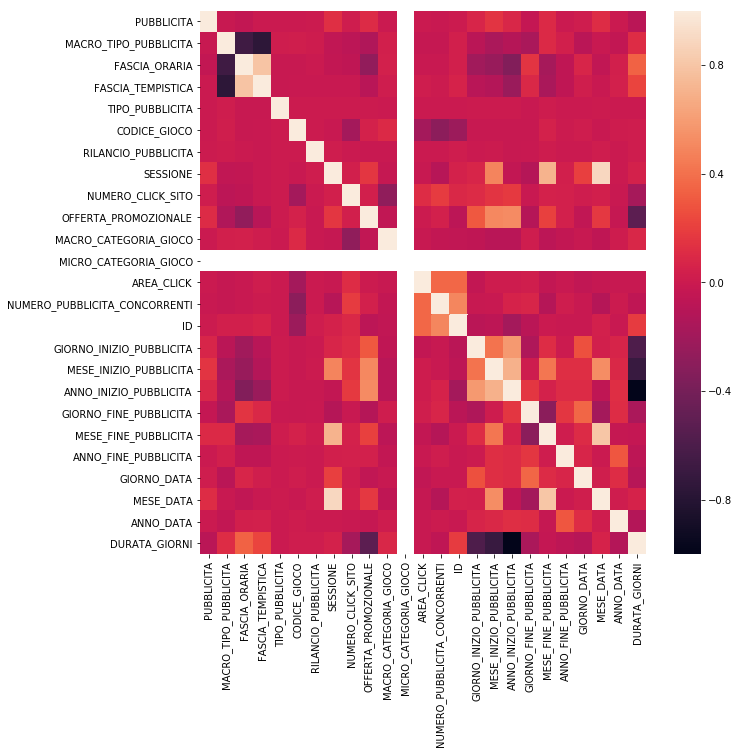

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())
plt.show()

#### Some observations on correlated variables
- Very high positive correlation between "MESE_DATA" and "SESSIONE" so i'll remove "MESE_DATA"
- Very high negative correlation between "ANNO_FINE_PUBBLICITA" and "ANNO_INIZIO_PUBBLICITA" so i'll remove "ANNO_INIZIO_PUBBLICITA" because it is also high negative correlated with "DURATA_GIORNI"
- High negative correlation between "DURATA_GIORNI" and both "GIORNO_INIZIO_PUBBLICITA", "MESE_INIZIO_PUBBLICITA" but i remove the last two because i think "DURATA_GIORNI" is more significative
- Medium negative correlation between "DURATA_GIORNI" and "OFFERTA_PROMOZIONALE". For the moment i don't remove any column
- Very high negative correlation between "MACRO_TIPO_PUBBLICITA", "FASCIA_ORARIA" and "FASCIA_TEMPISTICA" so i'll remove "MACRO_TIPO_PUBBLICITA" (Maybe try PCA)

In [25]:
del dataset['ANNO_INIZIO_PUBBLICITA']
del dataset['MESE_INIZIO_PUBBLICITA']
del dataset['GIORNO_INIZIO_PUBBLICITA']
del dataset['MACRO_TIPO_PUBBLICITA']
del dataset['MESE_DATA']

In [26]:
pca = PCA(n_components=1)
dataset['FASCIA_PCA'] = pca.fit_transform(dataset[['FASCIA_ORARIA', 'FASCIA_TEMPISTICA']])
dataset = dataset.drop(['FASCIA_ORARIA', 'FASCIA_TEMPISTICA'], axis=1)

In [27]:
dataset.to_csv('../data/processed/preprocessed.csv', index=False)

Data normalization
Not needed with random forest

In [25]:
# X_cols = list(set(dataset.columns) - {'ID', 'NUMERO_CLICK_SITO'})
# dataset[X_cols] = dataset[X_cols].apply(scale)

/home/mikedev/Programming/Software/Python/venvs/IA3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [26]:
# dataset.head()

PUBBLICITA  TIPO_PUBBLICITA  CODICE_GIOCO  RILANCIO_PUBBLICITA  SESSIONE  \
0   -0.317566        -0.063013     -1.752494            -1.733589 -1.530243   
1   -0.317566        -0.063013     -1.752494            -1.733589 -1.474676   
2   -0.317566        -0.063013     -1.752494            -1.636376 -1.508464   
3   -0.317566        -0.063013     -1.752494            -1.636376 -1.486788   
4   -0.317566        -0.063013     -1.752494            -1.403065 -0.405915   

   NUMERO_CLICK_SITO  OFFERTA_PROMOZIONALE  MACRO_CATEGORIA_GIOCO  \
0               5310             -1.092394               0.025703   
1               5310             -1.092394               0.025703   
2               5310             -1.092394               0.025703   
3               5310             -1.092394               0.025703   
4               5310             -1.092394               0.025703   

   MICRO_CATEGORIA_GIOCO  AREA_CLICK  NUMERO_PUBBLICITA_CONCORRENTI      ID  \
0                    0.0   -0.332927                      -0.201785  115713   
1                    0.0   -0.332927                      -0.201785  115714   
2                    0.0   -0.332927                      -0.201785  116028   
3                    0.0   -0.332927                      -0.201785  116030   
4                    0.0   -0.332927                      -0.201785  116874   

   GIORNO_INIZIO_PUBBLICITA  MESE_INIZIO_PUBBLICITA  ANNO_INIZIO_PUBBLICITA  \
0                 -0.918662               -1.087772               -0.460324   
1                 -0.918662               -1.087772               -0.460324   
2                 -0.918662               -1.087772               -0.460324   
3                 -0.918662               -1.087772               -0.460324   
4                 -0.918662               -1.087772               -0.460324   

   GIORNO_FINE_PUBBLICITA  MESE_FINE_PUBBLICITA  GIORNO_DATA  ANNO_DATA  \
0                0.995007               1.45205    -0.363031  -0.021718   
1                0.995007               1.45205     0.112401  -0.021718   
2                0.995007               1.45205    -0.125315  -0.021718   
3                0.995007               1.45205    -0.006457  -0.021718   
4                0.995007               1.45205    -1.195036  -0.021718   

   FASCIA_PCA  
0    0.667781  
1    0.667781  
2    0.667781  
3    0.667781  
4    0.667781